# British Airlines Project

In this notebook we'll explore customers' behaviour and build a machine learning model to predict whether customers will or will not buy a holiday

In [1]:
# importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import FeatureHasher

## Part 1. General understanding of the data

Before doing anything with the data we'll perform a superficial investigation to gain general understanding of it

In [2]:
import pandas as pd

customer_data = pd.read_csv("data/customer_booking.csv", encoding="windows-1251")
customer_data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


Column info:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Now simple statistic data

In [3]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [4]:
customer_data.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


Right now the dataset looks preety good. The next thing we'll do is to look at the distribution of numerical data

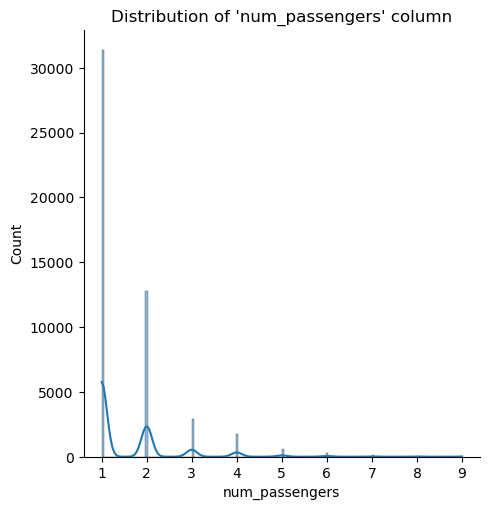

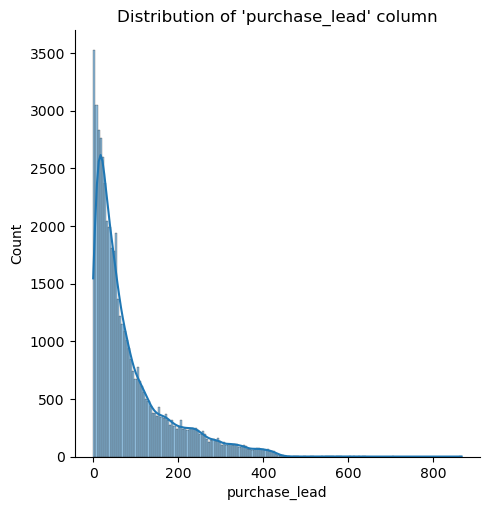

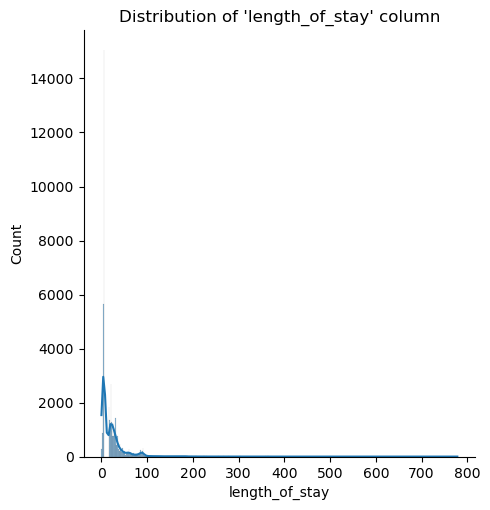

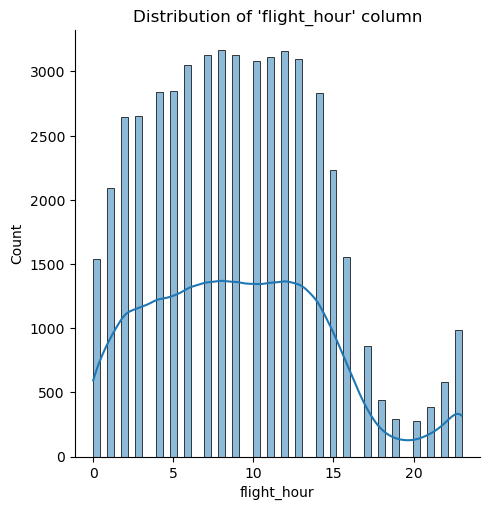

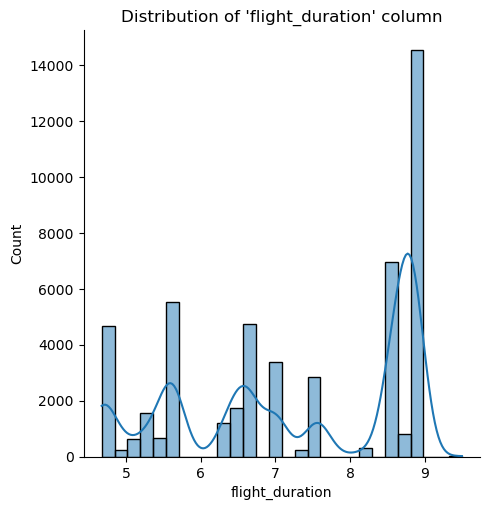

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = [
    "num_passengers",
    "purchase_lead",
    "length_of_stay",
    "flight_hour",
    "flight_duration"
]

for column in numeric_columns:
    sns.displot(customer_data[column], kde=True)
    plt.title(f"Distribution of '{column}' column")
    plt.show()

The features above are not normally distributed: some of them are totally random, others are left-skewed. If the perfomance of our future model will suffer because of that, the data will be normalized

## Part 2. Feature Engineering

Time to prepare the data. We have string columns. Let's have a look at them and decide how to encode them. The first one is sales channel

In [6]:
customer_data["sales_channel"].unique()

array(['Internet', 'Mobile'], dtype=object)

This feature can be encoded as binary - as it has only 2 values. Let's do just that.

In [7]:
sales_encoded = pd.get_dummies(customer_data["sales_channel"], drop_first=True)
customer_data["sales_channel"] = sales_encoded
customer_data.rename(columns={"sales_channel":"mobile"}, inplace=True)
customer_data.head()

,num_passengers,mobile,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,0,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,0,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,0,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,0,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


Moving on to the type of the trip

In [8]:
customer_data["trip_type"].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

It will be also encoded in binary, however, we'll add 3 columns to accurately represent this feauture

In [9]:
trip_encoded = pd.get_dummies(customer_data["trip_type"], prefix="trip_type_")
customer_data = pd.concat([customer_data, trip_encoded], axis=1)
customer_data.drop(columns=["trip_type"], inplace=True)
customer_data.head()

,num_passengers,mobile,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,trip_type__CircleTrip,trip_type__OneWay,trip_type__RoundTrip
0,2,0,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,0,0,1
1,1,0,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,0,0,1
2,2,0,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,0,0,1
3,1,0,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,0,0,1
4,2,0,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,0,0,1


`flight_day` represents week days, which is ordinary data, so it makes sense to encode them using numbers from 1 to 7.

In [10]:
customer_data["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [11]:
flight_day_dic = {
    "Mon":1,
    "Tue":2,
    "Wed":3,
    "Thu":4,
    "Fri":5,
    "Sat":6,
    "Sun":7
}

customer_data["flight_day"] = customer_data["flight_day"].apply(lambda x: flight_day_dic[x])
customer_data

,num_passengers,mobile,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,trip_type__CircleTrip,trip_type__OneWay,trip_type__RoundTrip
0,2,0,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,0,0,1
1,1,0,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,0,0,1
2,2,0,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,0,0,1
3,1,0,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,0,0,1
4,2,0,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0,0,0,1
49996,1,0,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0,0,0,1
49997,1,0,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0,0,0,1
49998,1,0,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0,0,0,1


Let's see how many different values the route has

In [12]:
customer_data["route"].unique()

array(['AKLDEL', 'AKLHGH', 'AKLHND', 'AKLICN', 'AKLKIX', 'AKLKTM',
       'AKLKUL', 'AKLMRU', 'AKLPEK', 'AKLPVG', 'AKLTPE', 'AORICN',
       'AORKIX', 'AORKTM', 'AORMEL', 'BBIMEL', 'BBIOOL', 'BBIPER',
       'BBISYD', 'BDOCTS', 'BDOCTU', 'BDOHGH', 'BDOICN', 'BDOIKA',
       'BDOKIX', 'BDOMEL', 'BDOOOL', 'BDOPEK', 'BDOPER', 'BDOPUS',
       'BDOPVG', 'BDOSYD', 'BDOTPE', 'BDOXIY', 'BKICKG', 'BKICTS',
       'BKICTU', 'BKIHND', 'BKIICN', 'BKIKIX', 'BKIKTM', 'BKIMEL',
       'BKIMRU', 'BKIOOL', 'BKIPEK', 'BKIPER', 'BKIPUS', 'BKIPVG',
       'BKISYD', 'BKIXIY', 'BLRICN', 'BLRMEL', 'BLRPER', 'BLRSYD',
       'BOMMEL', 'BOMOOL', 'BOMPER', 'BOMSYD', 'BTJJED', 'BTUICN',
       'BTUPER', 'BTUSYD', 'BTUWUH', 'BWNCKG', 'BWNDEL', 'BWNHGH',
       'BWNIKA', 'BWNKTM', 'BWNMEL', 'BWNOOL', 'BWNPER', 'BWNSYD',
       'BWNTPE', 'CANDEL', 'CANIKA', 'CANMEL', 'CANMRU', 'CANOOL',
       'CANPER', 'CANSYD', 'CCUMEL', 'CCUMRU', 'CCUOOL', 'CCUPER',
       'CCUSYD', 'CCUTPE', 'CEBMEL', 'CEBOOL', 'CEBPER', 'CEBS

In [13]:
len(customer_data["route"].unique())

799

There are 799 unique variables which means that the data is highly cardinal. We'll remove it for now. In case the model needs improvemnt, we'll encode them

In [17]:
customer_data = customer_data.drop(columns=["route"])
customer_data

,num_passengers,mobile,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,trip_type__CircleTrip,trip_type__OneWay,trip_type__RoundTrip
0,2,0,262,19,7,6,New Zealand,1,0,0,5.52,0,0,0,1
1,1,0,112,20,3,6,New Zealand,0,0,0,5.52,0,0,0,1
2,2,0,243,22,17,3,India,1,1,0,5.52,0,0,0,1
3,1,0,96,31,4,6,New Zealand,0,0,1,5.52,0,0,0,1
4,2,0,68,22,15,3,India,1,0,1,5.52,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0,27,6,9,6,Australia,1,0,1,5.62,0,0,0,1
49996,1,0,111,6,4,7,Australia,0,0,0,5.62,0,0,0,1
49997,1,0,24,6,22,6,Australia,0,0,1,5.62,0,0,0,1
49998,1,0,15,6,11,1,Australia,1,0,1,5.62,0,0,0,1


Let's look at the booking_origin

In [18]:
customer_data["booking_origin"].unique()

array(['New Zealand', 'India', 'United Kingdom', 'China', 'South Korea',
       'Japan', 'Malaysia', 'Singapore', 'Switzerland', 'Germany',
       'Indonesia', 'Czech Republic', 'Vietnam', 'Thailand', 'Spain',
       'Romania', 'Ireland', 'Italy', 'Slovakia', 'United Arab Emirates',
       'Tonga', 'Rйunion', '(not set)', 'Saudi Arabia', 'Netherlands',
       'Qatar', 'Hong Kong', 'Philippines', 'Sri Lanka', 'France',
       'Croatia', 'United States', 'Laos', 'Hungary', 'Portugal',
       'Cyprus', 'Australia', 'Cambodia', 'Poland', 'Belgium', 'Oman',
       'Bangladesh', 'Kazakhstan', 'Brazil', 'Turkey', 'Kenya', 'Taiwan',
       'Brunei', 'Chile', 'Bulgaria', 'Ukraine', 'Denmark', 'Colombia',
       'Iran', 'Bahrain', 'Solomon Islands', 'Slovenia', 'Mauritius',
       'Nepal', 'Russia', 'Kuwait', 'Mexico', 'Sweden', 'Austria',
       'Lebanon', 'Jordan', 'Greece', 'Mongolia', 'Canada', 'Tanzania',
       'Peru', 'Timor-Leste', 'Argentina', 'New Caledonia', 'Macau',
       'Myanmar (

The same situation as above - delete for now, might use it later

In [19]:
customer_data = customer_data.drop(columns=["booking_origin"])
customer_data

,num_passengers,mobile,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,trip_type__CircleTrip,trip_type__OneWay,trip_type__RoundTrip
0,2,0,262,19,7,6,1,0,0,5.52,0,0,0,1
1,1,0,112,20,3,6,0,0,0,5.52,0,0,0,1
2,2,0,243,22,17,3,1,1,0,5.52,0,0,0,1
3,1,0,96,31,4,6,0,0,1,5.52,0,0,0,1
4,2,0,68,22,15,3,1,0,1,5.52,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0,27,6,9,6,1,0,1,5.62,0,0,0,1
49996,1,0,111,6,4,7,0,0,0,5.62,0,0,0,1
49997,1,0,24,6,22,6,0,0,1,5.62,0,0,0,1
49998,1,0,15,6,11,1,1,0,1,5.62,0,0,0,1


## Part 3. Modeling

Now the data is ready for ml. We'll use random forest for the time being

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate


y = customer_data["booking_complete"]
X = customer_data.drop(columns=["booking_complete"])
rf = RandomForestClassifier()

results = cross_validate(rf, X, y, scoring=("recall", "precision", "roc_auc"), return_train_score=True)
for result in results:
    if result != "fit_time" and result != "score_time":
        print(f"{result} - {results[result].mean()}")

test_recall - 0.18744030905156225
train_recall - 0.9976264243172439
test_precision - 0.16734376033824772
train_precision - 0.999731925852444
test_roc_auc - 0.4443615774558906
train_roc_auc - 0.9999993572852002


About the used metircs:
- ROC_AUC - the classifier's ability to distinguish between positive and negative instances across different probability thresholds. It provides a single value that represents the classifier's overall performance. Its range is from 0 to 1, the latter meaning the best perfomance
- Precision - it measures the proportion of correctly predicted positive instances out of all instances predicted as positive. Its range is from 0 to 1, the latter meaning the best perfomance
- Recall - it measures the proportion of correctly predicted positive instances out of all actual positive instances. Its range is from 0 to 1, the latter meaning the best perfomance

Looking at the results, we can say that the model is overfitted - high training scores, low test scores

Let's try using another model - Gradient Booster Classifier

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

y = customer_data["booking_complete"]
X = customer_data.drop(columns=["booking_complete"])
gbs = GradientBoostingClassifier()

results = cross_validate(gbs, X, y, scoring=("recall", "precision", "roc_auc"), return_train_score=True)
for result in results:
    if result != "fit_time" and result != "score_time":
        print(f"{result} - {results[result].mean()}")

test_recall - 0.20053475935828877
train_recall - 0.05095261269909233
test_precision - 0.03936811597966518
train_precision - 0.8342281940436372
test_roc_auc - 0.4568463174750361
train_roc_auc - 0.7374115067823545


Even worse than before. Last attempt - Multiple Layer Perceptron Classifier

In [25]:
from sklearn.neural_network import MLPClassifier

y = customer_data["booking_complete"]
X = customer_data.drop(columns=["booking_complete"])
mlp = MLPClassifier()

results = cross_validate(mlp, X, y, scoring=("recall", "precision", "roc_auc"), return_train_score=True)
for result in results:
    if result != "fit_time" and result != "score_time":
        print(f"{result} - {results[result].mean()}")

/home/sergey/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sergey/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sergey/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


test_recall - 0.006149732620320855
train_recall - 0.041524568133058146
test_precision - 0.07348545184887204
train_precision - 0.4769145860109562
test_roc_auc - 0.4631586940475869
train_roc_auc - 0.691715895478098


Very, very bad. Random forest is still better than gradient boositng and neural network

Let's see what features random forest deems as important

In [28]:
rf = RandomForestClassifier()
rf.fit(X, y)
imp_features = rf.feature_importances_
imp_features

array([0.05610174, 0.00964699, 0.29447833, 0.16273128, 0.19562796,
       0.11264077, 0.01243693, 0.0139194 , 0.01984443, 0.12038544,
       0.00036357, 0.00072447, 0.00109871])

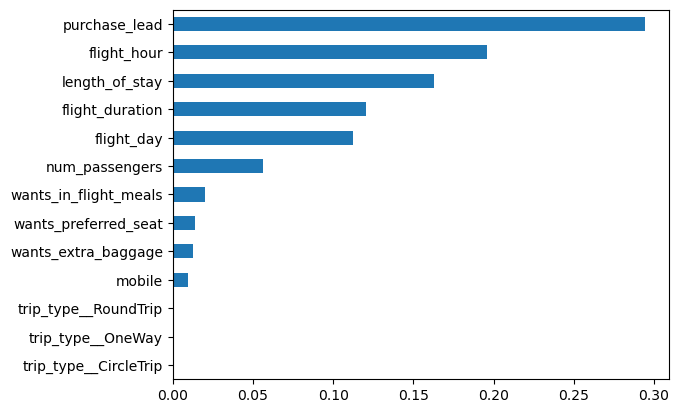

In [37]:
labels = X.columns.to_list()
feature_importance_data = pd.DataFrame({"features":imp_features}, index=labels).sort_values(by="features")
feature_importance_data.plot(kind="barh", legend=False)
plt.show()

## Summary

- the perfomance of random forest, the model proposed in the task, is poor and desperately need improvement. Possible solutions: get more data (both in terms of rows and columns, i. e. customer information), engineer new features, normalize data, choose another model
- when it comes to feature importance, the top-5 is: purchase_lead (by a lot), flight_hour, length_of_stay, flight_duration, flight_day